In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

dataset = pd.read_csv("CRData17.csv")

In [13]:
#dataset.head(5)

In [14]:
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import train_test_split
x = dataset.iloc[:,[3,7]].values
y = dataset.iloc[:,19].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
imputer = Imputer(missing_values= 'Nan', strategy='mean',axis = 0)

In [15]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(x_train,y_train)

y_pred=logreg.predict(x_test)

In [16]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[88,  0],
       [ 4,  0]])

Text(0.5,257.44,'Predicted label')

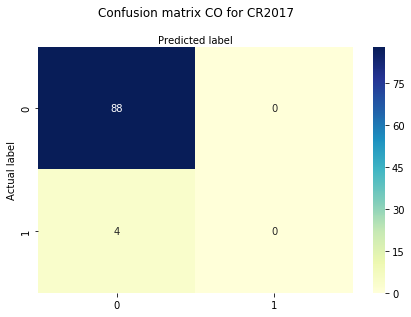

In [21]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix CO for CR2017', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [22]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9565217391304348
Precision: 0.0
Recall: 0.0


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
